In [25]:
from sklearn.preprocessing import PolynomialFeatures
from pandas import Series
import pandas as pd
import numpy as np
from datetime import datetime
from fbprophet import Prophet
df = pd.read_csv('fxpo2.csv').dropna()
#df = pd.read_csv('kaz.csv').dropna()
df.date = pd.to_datetime(df.date)
#df = df.drop_duplicates()
df.tail()

,date,FXPO.L.Open,FXPO.L.High,FXPO.L.Low,FXPO.L.Close,FXPO.L.Volume,FXPO.L.Adjusted
2658,2017-12-18,268.299988,282.200012,263.200012,281.100006,3280032.0,281.100006
2659,2017-12-19,278.299988,285.899994,277.600006,281.399994,5269426.0,281.399994
2660,2017-12-20,281.200012,292.399994,279.200012,285.399994,2069135.0,285.399994
2661,2017-12-21,286.500000,294.700012,283.399994,289.000000,2916102.0,289.000000
2662,2017-12-22,289.600006,296.799988,287.100006,287.799988,1151210.0,287.799988


In [26]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [27]:
predictions = 15
df = df[['date','FXPO.L.Close']]
#df.reset_index(inplace=True)
df.columns = ['ds', 'y']
#train_df = df[:-predictions]
train_df = df
#train_df.reset_index(inplace=True)
train_df.tail()

,ds,y
2658,2017-12-18,281.100006
2659,2017-12-19,281.399994
2660,2017-12-20,285.399994
2661,2017-12-21,289.000000
2662,2017-12-22,287.799988


In [31]:
#we <- seq(as.Date('2007-01-01'),as.Date('2017-12-31'),by = 1)
#we <- we[!weekdays(we) %in% c('Saturday','Sunday')]
hol = ['2017-12-25','2017-12-26','2018-01-01',
                '2018-03-30','2018-04-02','2018-05-07',
                '2018-05-28','2018-08-27','2018-12-25',
                '2018-12-26','2019-01-01']
holidays = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(hol),
  'lower_window': 0,
  'upper_window': 0,
})

def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 or date.weekday() == 1:
        return 1
    else:
        return 0
    
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)



In [32]:
m = Prophet(holidays=holidays)
m.add_regressor('nfl_sunday')
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=predictions)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
forecast = m.predict(future)


<IPython.core.display.Javascript object>


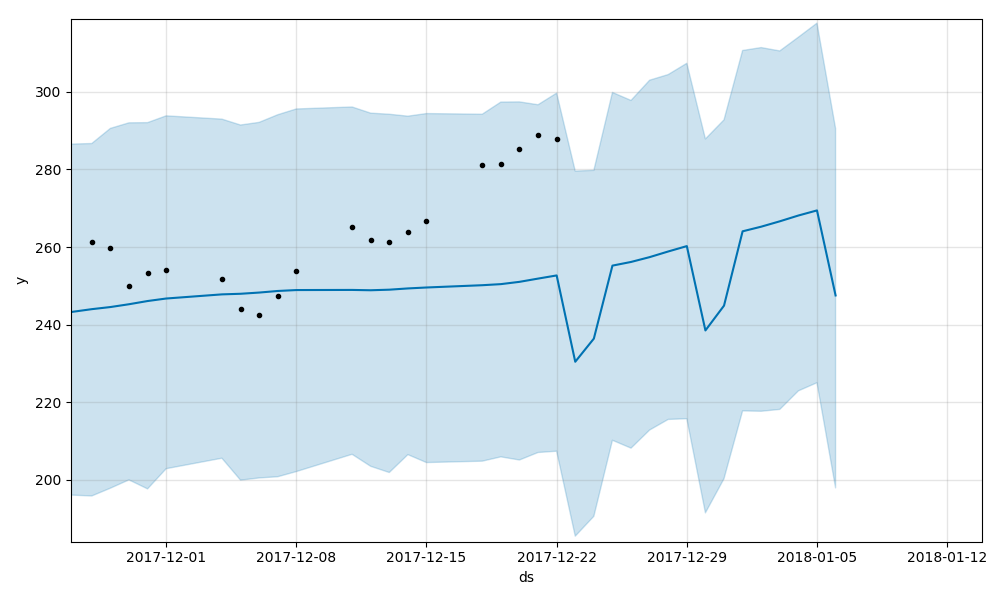

In [34]:
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-30:])
m.plot(forecast);

<IPython.core.display.Javascript object>


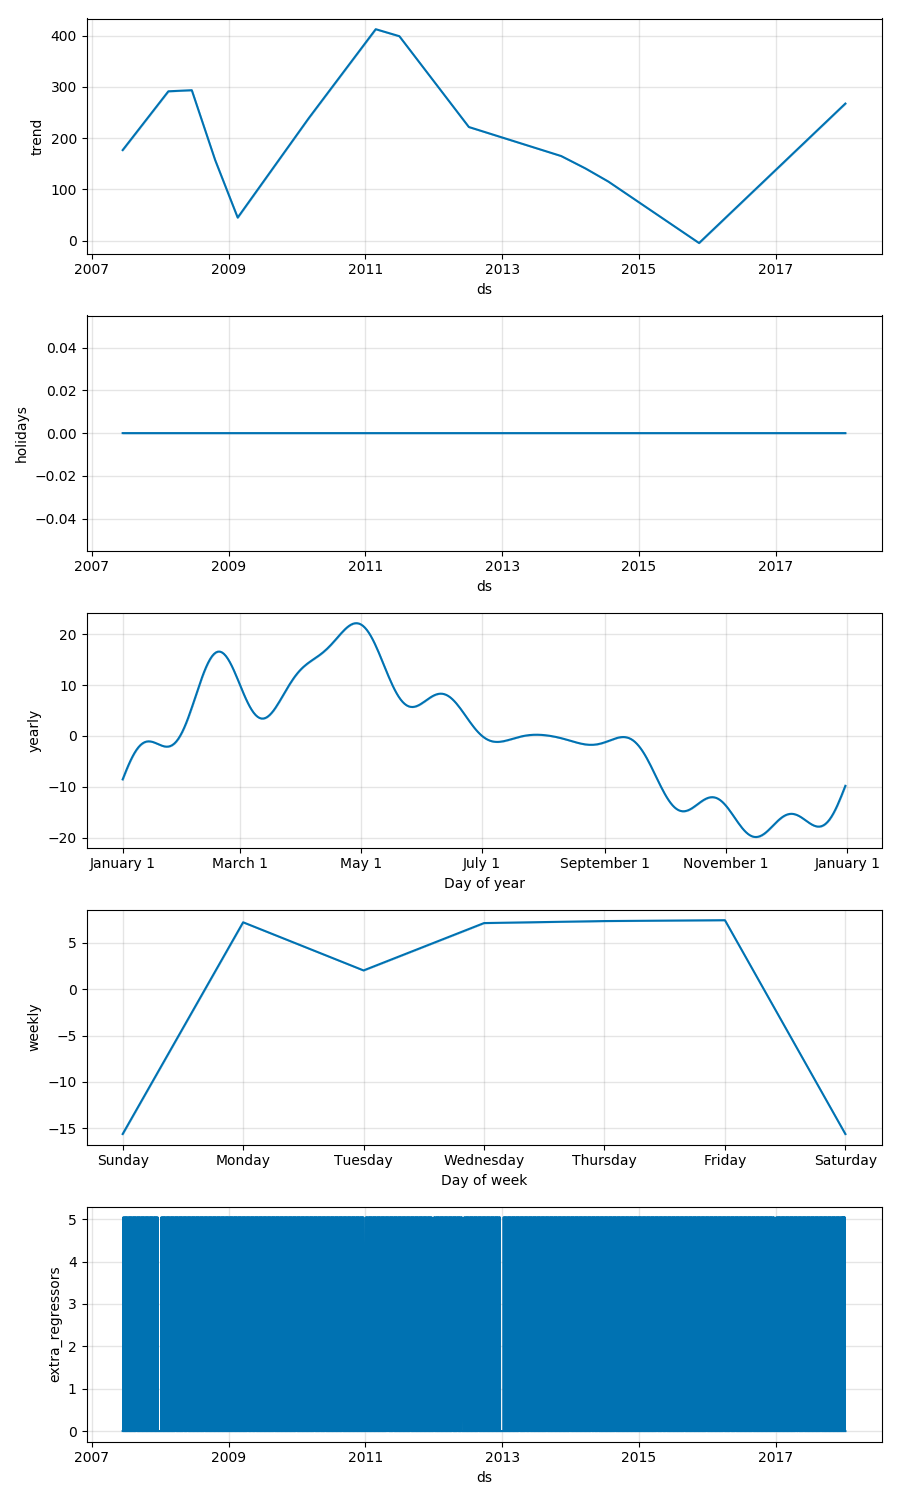

In [35]:
m.plot_components(forecast);